# DSP2: Endterm Group Project

### Topic: Patient Survival Prediction

### Deadline: until 10 week

### Goal of a project: Use classification model to our datasets and seeing result from it

### Context

#### In this dataset, there are various factors given, which are involved when a patient is hospitalized. On the basis of these factors, predict whether the patient will survive or not.

### Group members BD-2005 students: Adilkhan M. , Assanali K. , Zhanibek B.

## Data Desciption


dataset.csv - 91713 rows x 85 columns (hospital_death as Target)

Attributes
* encounter_id
* patient_id
* hospital_id
* age
* bmi
* elective_surgery
* ethnicity
* gender
* height
* icu_admit_source
* icu_id
* icu_stay_type 
* icu_type
* pre_icu_los_days
* weight 
* apache_2_diagnosis 
* apache_3j_diagnosis
* apache_post_operative
* arf_apache
* gcs_eyes_apache
* gcs_motor_apache
* gcs_unable_apache
* gcs_verbal_apache
* heart_rate_apache
* intubated_apache
* map_apache
* resprate_apache
* temp_apache
* ventilated_apache
* d1_diasbp_max
* d1_diasbp_min
* d1_diasbp_noninvasive_max
* d1_diasbp_noninvasive_min
* d1_heartrate_max
* d1_heartrate_min
* d1_mbp_max
* d1_mbp_min
* d1_mbp_noninvasive_max
* d1_mbp_noninvasive_min
* d1_resprate_max
* d1_resprate_min
* d1_spo2_max
* d1_spo2_min
* d1_sysbp_max
* d1_sysbp_min
* d1_sysbp_noninvasive_max
* d1_sysbp_noninvasive_min
* d1_temp_max
* d1_temp_min
* h1_diasbp_max
* h1_diasbp_min
* h1_diasbp_noninvasive_max
* h1_diasbp_noninvasive_min
* h1_heartrate_max
* h1_heartrate_min
* h1_mbp_max
* h1_mbp_min
* h1_mbp_noninvasive_max
* h1_mbp_noninvasive_min
* h1_resprate_max
* h1_resprate_min
* h1_spo2_max
* h1_spo2_min
* h1_sysbp_max
* h1_sysbp_min
* h1_sysbp_noninvasive_max
* h1_sysbp_noninvasive_min
* d1_glucose_max
* d1_glucose_min
* d1_potassium_max
* d1_potassium_min
* apache_4a_hospital_death_prob
* apache_4a_icu_death_prob
* aids,cirrhosis
* diabetes_mellitus
* hepatic_failure
* immunosuppression
* leukemia
* lymphoma
* solid_tumor_with_metastasis
* apache_3j_bodysystem
* apache_2_bodysystem
* hospital_death

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## Loading and Checking Dataset

In [3]:
df=pd.read_csv('dataset.csv')
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
df.shape

(91713, 85)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.000000,32852.000000,65665.000000,98342.000000,131051.00000
patient_id,91713.0,65537.131464,37811.252183,1.000000,32830.000000,65413.000000,98298.000000,131051.00000
hospital_id,91713.0,105.669262,62.854406,2.000000,47.000000,109.000000,161.000000,204.00000
age,87485.0,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.00000
bmi,88284.0,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.81499
...,...,...,...,...,...,...,...,...
leukemia,90998.0,0.007066,0.083763,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,90998.0,0.004132,0.064148,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,90998.0,0.020638,0.142169,0.000000,0.000000,0.000000,0.000000,1.00000
Unnamed: 83,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preparation

### Checking for single value columns

In [6]:
df.nunique()

encounter_id                   91713
patient_id                     91713
hospital_id                      147
age                               74
bmi                            34888
                               ...  
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Unnamed: 83                        0
hospital_death                     2
Length: 85, dtype: int64

## Data cleaning

### Removing unnamed column

In [7]:
df.drop(df.columns[-2], axis=1, inplace=True)
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


### Duplicates

In [8]:
df.loc[df.duplicated()]

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death


### Dealing with missing values

In [9]:
(df.isnull().sum())

encounter_id                      0
patient_id                        0
hospital_id                       0
age                            4228
bmi                            3429
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 84, dtype: int64

In [10]:
print("Number of rows with missing values:", df.isnull().any(axis=1).sum())

Number of rows with missing values: 34778


In [11]:
df = df.drop(columns = ['hospital_id', 'icu_id', 'encounter_id', 'patient_id'], axis=1)

In [12]:
df.head(5)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [13]:
df.shape[0]

91713

In [14]:
#Number of rows with missing values: 34778
print("Number of rows with missing values:", df.isnull().any(axis=1).sum())

Number of rows with missing values: 34778


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      90318 non-null  object 
 4   gender                         91688 non-null  object 
 5   height                         90379 non-null  float64
 6   icu_admit_source               91601 non-null  object 
 7   icu_stay_type                  91713 non-null  object 
 8   icu_type                       91713 non-null  object 
 9   pre_icu_los_days               91713 non-null  float64
 10  weight                         88993 non-null  float64
 11  apache_2_diagnosis             90051 non-null  float64
 12  apache_3j_diagnosis            90612 non-null 

#### Filling missing values in categorical columns

In [16]:
categorical = [i for i in df.columns if df[i].dtype=="O"]
categorical

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [17]:
for uniq in categorical:
    print(df[uniq].unique(), '\n')

['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown'] 

['M' 'F' nan] 

['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan] 

['admit' 'readmit' 'transfer'] 

['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU'] 

['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological'] 

['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses'] 



In [18]:
df[categorical].isnull().sum()

ethnicity               1395
gender                    25
icu_admit_source         112
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [19]:
#Filling by mean value all numerical columns
for i in categorical:
    df[i].fillna(df[i].value_counts().index[0], inplace=True)
    

In [20]:
df[categorical].isnull().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

#### Filling missing values in categorical columns

In [21]:
numerical = [i for i in df.columns if df[i].dtype!="O"]
numerical

['age',
 'bmi',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasi

In [22]:
#Filling by mean value all numerical columns
for i in numerical:
    df[i] = df[i].fillna(df[i].mean())

In [23]:
df[numerical].isnull().sum()

age                            0
bmi                            0
elective_surgery               0
height                         0
pre_icu_los_days               0
                              ..
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
hospital_death                 0
Length: 73, dtype: int64

In [24]:
print("Number of rows with missing values:", df.isnull().any(axis=1).sum())

Number of rows with missing values: 0


### Label encoding categorical columns

In [25]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for i in categorical:
    df[i] = lr.fit_transform(df[i])
    
df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,2,1,180.3,1,0,2,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,77.0,27.420000,0,2,0,160.0,1,0,5,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
2,25.0,31.950000,0,2,0,172.7,0,0,5,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0
3,81.0,22.640000,1,2,0,165.1,2,0,2,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,19.0,29.185818,0,2,1,188.0,0,0,5,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7,0


### Checking updated dataframe

In [26]:
df.shape[0]

91713

In [27]:
#all columns are numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  int32  
 4   gender                         91713 non-null  int32  
 5   height                         91713 non-null  float64
 6   icu_admit_source               91713 non-null  int32  
 7   icu_stay_type                  91713 non-null  int32  
 8   icu_type                       91713 non-null  int32  
 9   pre_icu_los_days               91713 non-null  float64
 10  weight                         91713 non-null  float64
 11  apache_2_diagnosis             91713 non-null  float64
 12  apache_3j_diagnosis            91713 non-null 

### Scaling

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
df[:] = scaler.fit_transform(df)
df

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,0.712329,0.148859,0.0,0.4,1.0,0.738140,0.25,0.0,0.285714,0.138498,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.9,0.000000,0.0
1,0.835616,0.237400,0.0,0.4,0.0,0.390478,0.25,0.0,0.714286,0.140596,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.8,0.666667,0.0
2,0.123288,0.322920,0.0,0.4,0.0,0.607981,0.00,0.0,0.714286,0.135558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.0
3,0.890411,0.147160,1.0,0.4,0.0,0.477822,0.50,0.0,0.285714,0.135558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.041096,0.270736,0.0,0.4,1.0,0.870012,0.00,0.0,0.714286,0.135955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.777778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0.808219,0.155094,0.0,0.4,1.0,0.695325,0.25,0.0,0.428571,0.137177,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.9,0.000000,0.0
91709,0.547945,0.610434,0.0,0.4,0.0,0.784381,0.25,0.0,0.714286,0.136207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.000000,0.0
91710,0.438356,0.233943,0.0,0.4,1.0,0.565165,0.00,0.0,0.714286,0.135807,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.0
91711,0.634377,0.159572,0.0,0.4,0.0,0.303134,0.00,0.0,0.714286,0.136000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.666667,0.0


# Data Modelling

In [29]:
# !pip install xgboost
# !pip install mlxtend

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier

In [31]:
df.shape[1]

80

In [32]:
X = df.drop(columns=['hospital_death'], axis=1)
y = df['hospital_death']
X.shape[1]

79

#### Correlation of features with target

In [33]:
feature_corr=pd.DataFrame(df.drop("hospital_death", axis=1).apply(lambda x: x.corr(df.hospital_death)))
feature_corr=feature_corr.abs()
feature_corr.sort_values([0],ascending=False, inplace=True)
feature_corr.head(40)

,0
apache_4a_hospital_death_prob,0.299738
gcs_motor_apache,0.276794
apache_4a_icu_death_prob,0.273594
gcs_eyes_apache,0.255160
gcs_verbal_apache,0.236218
ventilated_apache,0.227462
d1_sysbp_min,0.209780
d1_spo2_min,0.209462
d1_sysbp_noninvasive_min,0.208513
d1_temp_min,0.203179


In [34]:
# taking parameters with correlation coef>0.1
important_columns=feature_corr[feature_corr[0]>0.1].index
X=X[important_columns]
X

,apache_4a_hospital_death_prob,gcs_motor_apache,apache_4a_icu_death_prob,gcs_eyes_apache,gcs_verbal_apache,ventilated_apache,d1_sysbp_min,d1_spo2_min,d1_sysbp_noninvasive_min,d1_temp_min,...,h1_diasbp_noninvasive_min,h1_diasbp_min,h1_resprate_max,h1_heartrate_max,h1_resprate_min,heart_rate_apache,d1_potassium_max,age,h1_spo2_min,d1_resprate_max
0,0.552764,1.000000,0.532995,0.666667,0.750000,0.0,0.268908,0.74,0.268723,0.898494,...,0.445652,0.450549,0.326531,0.618644,0.095238,0.594595,0.285714,0.712329,0.740000,0.256410
1,0.738693,0.400000,0.654822,0.000000,0.000000,1.0,0.218487,0.70,0.218290,0.543224,...,0.282609,0.285714,0.428571,0.576271,0.148148,0.608108,0.333333,0.835616,0.700000,0.230769
2,0.502513,1.000000,0.507614,0.666667,1.000000,0.0,0.537815,0.91,0.537699,0.813906,...,0.391304,0.395604,0.204082,0.423729,0.084656,0.486486,0.345618,0.123288,0.910000,0.089744
3,0.522613,1.000000,0.522843,1.000000,1.000000,1.0,0.361345,0.95,0.361183,0.492472,...,0.448594,0.241758,0.040816,0.457627,0.058201,0.567568,0.523810,0.890411,0.990000,0.115385
4,0.546124,0.894239,0.529926,0.821683,0.748694,0.0,0.663866,0.96,0.663781,0.813906,...,0.500000,0.505495,0.257829,0.364407,0.091066,0.202703,0.345618,0.041096,1.000000,0.051282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0.562814,1.000000,0.532995,1.000000,1.000000,1.0,0.218487,0.85,0.218290,0.796989,...,0.239130,0.241758,0.285714,0.550847,0.084656,0.574324,0.333333,0.808219,0.970000,0.166667
91709,0.517588,1.000000,0.517766,1.000000,1.000000,0.0,0.201681,0.45,0.201479,0.712401,...,0.369565,0.373626,0.367347,0.364407,0.116402,0.472973,0.238095,0.547945,0.960000,0.243590
91710,0.527638,1.000000,0.517766,0.666667,0.750000,0.0,0.285714,0.81,0.285534,0.661648,...,0.448594,0.448771,0.257829,0.391773,0.091066,0.864865,0.452381,0.438356,0.951743,0.256410
91711,0.537688,0.800000,0.517766,1.000000,0.750000,0.0,0.588235,0.83,0.588131,0.746236,...,0.448594,0.448771,0.257829,0.391773,0.091066,0.202703,0.345618,0.634377,0.951743,0.115385


#### Forward stepwise selection using imblearn

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [36]:
# lreg=LogisticRegression()
# sfs1=sfs(lreg,k_features=10,forward=False,verbose=2,scoring='precision')

# sfs1=sfs1.fit(X,y)

In [37]:
feat_names=['apache_4a_icu_death_prob',
 'ventilated_apache',
 'd1_sysbp_min',
 'd1_spo2_min',
 'd1_temp_min',
 'd1_mbp_min',
 'intubated_apache',
 'h1_sysbp_min',
 'h1_mbp_noninvasive_min',
 'd1_potassium_max']
# feat_names=list(sfs1.k_feature_names_)
feat_names

['apache_4a_icu_death_prob',
 'ventilated_apache',
 'd1_sysbp_min',
 'd1_spo2_min',
 'd1_temp_min',
 'd1_mbp_min',
 'intubated_apache',
 'h1_sysbp_min',
 'h1_mbp_noninvasive_min',
 'd1_potassium_max']

In [38]:
# updating X dataframe
X=X[feat_names]
X.head()

,apache_4a_icu_death_prob,ventilated_apache,d1_sysbp_min,d1_spo2_min,d1_temp_min,d1_mbp_min,intubated_apache,h1_sysbp_min,h1_mbp_noninvasive_min,d1_potassium_max
0,0.532995,0.0,0.268908,0.74,0.898494,0.266667,0.0,0.439716,0.500000,0.285714
1,0.654822,1.0,0.218487,0.70,0.543224,0.177778,0.0,0.127660,0.235849,0.333333
2,0.507614,0.0,0.537815,0.91,0.813906,0.511111,0.0,0.503546,0.481132,0.345618
3,0.522843,1.0,0.361345,0.95,0.492472,0.688889,1.0,0.375887,0.450088,0.523810
4,0.529926,0.0,0.663866,0.96,0.813906,0.755556,0.0,0.475177,0.566038,0.345618


## Dealing with imbalance

#### Proportion of classes

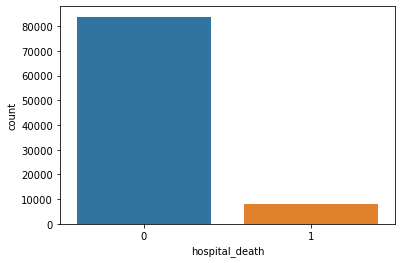

In [39]:
g = sns.countplot(df['hospital_death'])
g.set_xticklabels(['0','1'])
plt.show()

In [40]:
# !pip install imblearn

#### Synthetic Minority Oversampling Technique (SMOTE)

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape:')
print(y.value_counts())
print('Resample dataset shape:')
print(y_smote.value_counts())

Original dataset shape:
0.0    83798
1.0     7915
Name: hospital_death, dtype: int64
Resample dataset shape:
0.0    83798
1.0    83798
Name: hospital_death, dtype: int64


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size= 0.2, random_state=45)


# Logistic Regression

In [43]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = model1.predict(X_test)

print("Accuracy Test: {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
# print(report)

result = pd.DataFrame({'Algorithm used':['Logistic Regression'],'Accuracy score':[acc_score],
                       'Macro precision':[macro_precision], 'Macro recall':[macro_recall], 'Macro F1':[macro_f1]})

Accuracy Test: 0.7330847255369929
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     16775
         1.0       0.75      0.70      0.72     16745

    accuracy                           0.73     33520
   macro avg       0.73      0.73      0.73     33520
weighted avg       0.73      0.73      0.73     33520



# Decision Tree

In [45]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)


DecisionTreeClassifier()

In [62]:
y_pred = model2.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']

result.loc[len(result)] = ['Decision Trees', acc_score , macro_precision, macro_recall, macro_f1]

Accuracy Test: 0.9258949880668258
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     16775
         1.0       0.92      0.94      0.93     16745

    accuracy                           0.93     33520
   macro avg       0.93      0.93      0.93     33520
weighted avg       0.93      0.93      0.93     33520



## Random Forest

In [47]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)


RandomForestClassifier()

In [63]:
y_pred = model3.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']

result.loc[len(result)] = ['Random Forest', acc_score , macro_precision, macro_recall, macro_f1]

Accuracy Test: 0.9534904534606206
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     16775
         1.0       0.94      0.96      0.95     16745

    accuracy                           0.95     33520
   macro avg       0.95      0.95      0.95     33520
weighted avg       0.95      0.95      0.95     33520



## ExtraTreesClassifier

In [49]:
model4 = ExtraTreesClassifier()
model4.fit(X_train, y_train)


ExtraTreesClassifier()

In [64]:
y_pred = model4.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']

result.loc[len(result)] = ['Extra Trees', acc_score , macro_precision, macro_recall, macro_f1]

Accuracy Test: 0.9568317422434367
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     16775
         1.0       0.94      0.98      0.96     16745

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520



## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)

model5_2= model5.predict(X_test)

In [65]:
print("Accuracy Train: {}".format(accuracy_score(y_test,model5_2)))
print(classification_report(y_test,model5_2))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']

result.loc[len(result)] = ['KNN', acc_score , macro_precision, macro_recall, macro_f1]

Accuracy Train: 0.8931980906921241
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     16775
         1.0       0.83      1.00      0.90     16745

    accuracy                           0.89     33520
   macro avg       0.91      0.89      0.89     33520
weighted avg       0.91      0.89      0.89     33520



# Hyperparameter Tuning using RandomizedSearchCV / GridSearchCV

In [54]:
#...................

In [55]:
model2.tree_.max_depth

48

In [56]:

# from sklearn.model_selection import GridSearchCV
# max_depth = [1, 3, 5, 7, 10, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
# max_features = [1, 2, 5, 10]

# #Creating a dictionary for the hyper parameters
# hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
#               min_samples_leaf = min_samples_leaf, max_features=max_features)

# #Applying GridSearchCV to get the best value for hyperparameters
# gridT = GridSearchCV(model2, hyperT, cv = 3, verbose = 1, n_jobs = -1)
# bestT = gridT.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


In [57]:
# Printing the best hyperparameters
# print('The best hyper parameters are: \n',gridT.best_params_)

# Result:  {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 100}

The best hyper parameters are: 
 {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 100}


In [58]:
model2_1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=30, min_samples_leaf=5,min_samples_split=100, max_features=10)
model2_1.fit(X_train,y_train)
model2_1.score(X_test, y_test)

0.8409307875894988

In [66]:
y_pred = model2_1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

acc_score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']

result.loc[len(result)] = ['Decision Trees with tuning', acc_score , macro_precision, macro_recall, macro_f1]
result

Accuracy Test: 0.8409307875894988
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     16775
         1.0       0.83      0.85      0.84     16745

    accuracy                           0.84     33520
   macro avg       0.84      0.84      0.84     33520
weighted avg       0.84      0.84      0.84     33520



,Algorithm used,Accuracy score,Macro precision,Macro recall,Macro F1
0,Logistic Regression,0.733085,0.734274,0.733053,0.732728
1,Decision Trees,0.925895,0.926035,0.925903,0.925890
2,Random Forest,0.953490,0.953671,0.953500,0.953486
3,Extra Trees,0.956832,0.957803,0.956853,0.956810
4,KNN,0.956832,0.957803,0.956853,0.956810
5,Decision Trees with tuning,0.840931,0.841079,0.840940,0.840916


# Conclusion

In [67]:
result.sort_values(by=['Accuracy score'], ascending=False)

,Algorithm used,Accuracy score,Macro precision,Macro recall,Macro F1
3,Extra Trees,0.956832,0.957803,0.956853,0.956810
4,KNN,0.956832,0.957803,0.956853,0.956810
2,Random Forest,0.953490,0.953671,0.953500,0.953486
1,Decision Trees,0.925895,0.926035,0.925903,0.925890
5,Decision Trees with tuning,0.840931,0.841079,0.840940,0.840916
0,Logistic Regression,0.733085,0.734274,0.733053,0.732728
